In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from perception.util.conversion import get_euler_from_quaternion

In [2]:
# Read start time from txt file
with open("perception_debug/run3/bev/24_09_29_23:55:00/start_time.txt", "r") as f:
    start_time = int(f.read())
start_time

1727607306551390643

In [3]:
# Read the data from the CSV file
opp_rel_poses = pd.read_csv("perception_debug/run3/ego/24_09_29_23:54:58/color/opp_rel_poses.csv")
rwr_data = pd.read_csv("perception_debug/run3/ego/24_09_29_23:54:58/color/state_estimates_rwr.csv")
ca_data = pd.read_csv("perception_debug/run3/ego/24_09_29_23:54:58/color/state_estimates_kalman_ca.csv")
cv_data = pd.read_csv("perception_debug/run3/ego/24_09_29_23:54:58/color/state_estimates_kalman_cv.csv")
ca_depth_fusion_data = pd.read_csv("perception_debug/run3/ego/24_09_29_23:54:58/color/state_estimates_kalman_ca_depth_fusion.csv")

opp_rel_poses["time"] = opp_rel_poses["time"] - start_time
rwr_data["time"] = rwr_data["time"] - start_time
ca_data["time"] = ca_data["time"] - start_time
cv_data["time"] = cv_data["time"] - start_time
ca_depth_fusion_data["time"] = ca_depth_fusion_data["time"] - start_time

# Remove times before 0 and after 4e9
opp_rel_poses = opp_rel_poses[(opp_rel_poses["time"] >= 0) & (opp_rel_poses["time"] <= 4e9)]
rwr_data = rwr_data[(rwr_data["time"] >= 0) & (rwr_data["time"] <= 4e9)]
ca_data = ca_data[(ca_data["time"] >= 0) & (ca_data["time"] <= 4e9)]
cv_data = cv_data[(cv_data["time"] >= 0) & (cv_data["time"] <= 4e9)]
ca_depth_fusion_data = ca_depth_fusion_data[(ca_depth_fusion_data["time"] >= 0) & (ca_depth_fusion_data["time"] <= 4e9)]

opp_rel_poses[["roll", "pitch", "yaw"]] = opp_rel_poses[["qx", "qy", "qz", "qw"]].apply(
        lambda x: get_euler_from_quaternion(*x, degrees=True) if np.linalg.norm(x) > 0 else np.nan, axis=1, result_type="expand")

opp_rel_poses

,time,qx,qy,qz,qw,ax,ay,az,tx,ty,tz,depth_tx,depth_ty,depth_tz,roll,pitch,yaw
143,32428877,-0.714478,-0.699655,0.002072,0.000648,-2.243674,-2.197124,0.006507,-0.022129,0.007143,1.251857,-0.009180,0.008281,1.225485,-179.780852,0.117741,88.799074
144,65794125,0.714225,0.699403,-0.026018,0.006415,2.234688,2.188311,-0.081405,-0.022691,0.008838,1.250424,-0.009572,0.010123,1.222484,-178.437920,2.644447,88.834547
145,99159885,0.714266,0.698786,-0.037286,0.011501,2.227649,2.179372,-0.116287,-0.025132,0.011619,1.249526,-0.012042,0.013029,1.228479,-177.950304,3.975935,88.815891
146,132526157,-0.714262,-0.698945,0.034462,0.010859,-2.228539,-2.180748,0.107524,-0.026929,0.011557,1.247943,-0.014281,0.013071,1.252475,-176.346402,1.951297,88.820272
147,165892685,-0.714723,-0.698975,0.023051,0.008606,-2.233147,-2.183945,0.072023,-0.027891,0.011860,1.252744,-0.014818,0.013113,1.235474,-177.447421,1.198653,88.750313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,3836254541,-0.707726,-0.687481,0.114436,0.115753,-2.073112,-2.013808,0.335214,0.738963,-0.014614,1.299041,0.750323,-0.020072,1.297016,-161.265146,0.161795,88.363994
255,3869612365,-0.706740,-0.687506,0.117637,0.118387,-2.067094,-2.010838,0.344069,0.738844,-0.014474,1.299725,0.747020,-0.019836,1.292009,-160.786276,0.200180,88.453163
256,3902969933,-0.707313,-0.687288,0.114528,0.119279,-2.067713,-2.009172,0.334804,0.738405,-0.014429,1.299362,0.743369,-0.019720,1.286002,-160.963918,-0.111378,88.336006
257,3936327501,-0.707456,-0.687633,0.115301,0.115644,-2.072450,-2.014379,0.337768,0.737788,-0.014474,1.298600,0.743169,-0.019745,1.286001,-161.204099,0.234924,88.410744


<AxesSubplot: xlabel='time', ylabel='vpitch'>

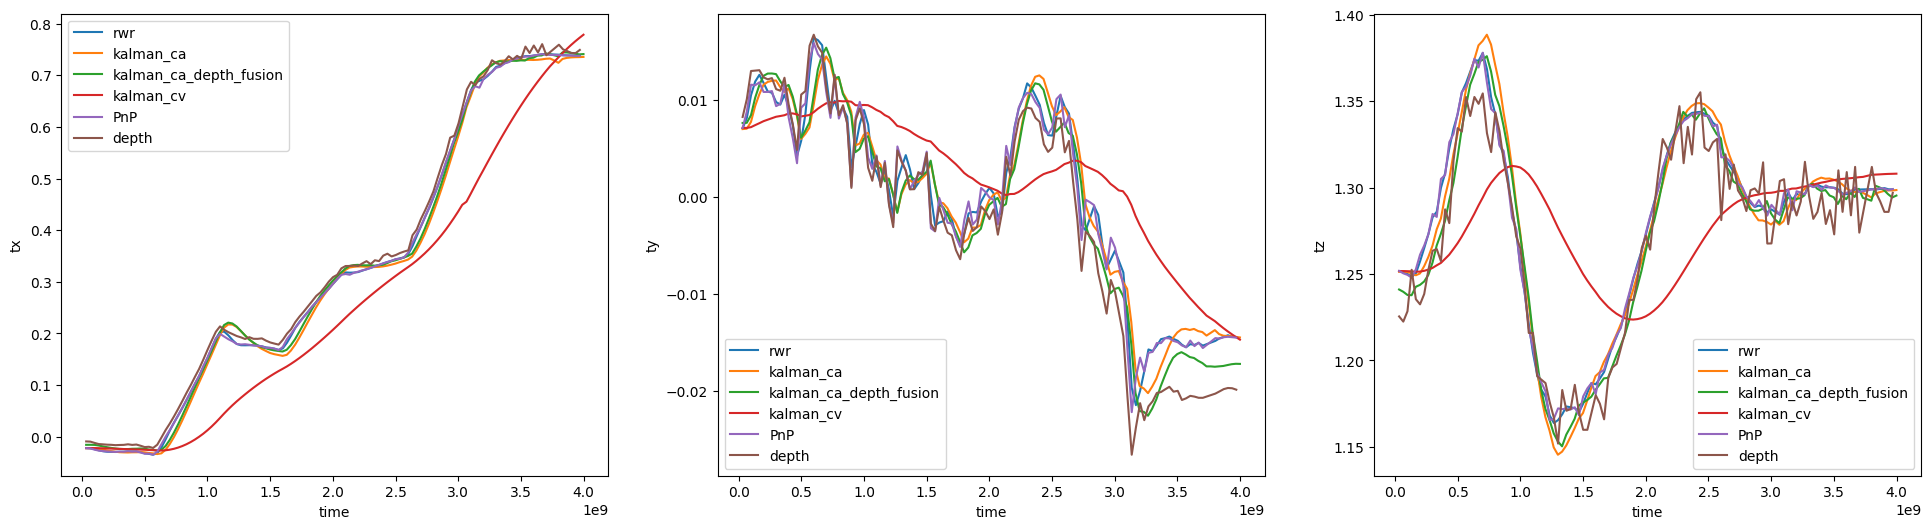

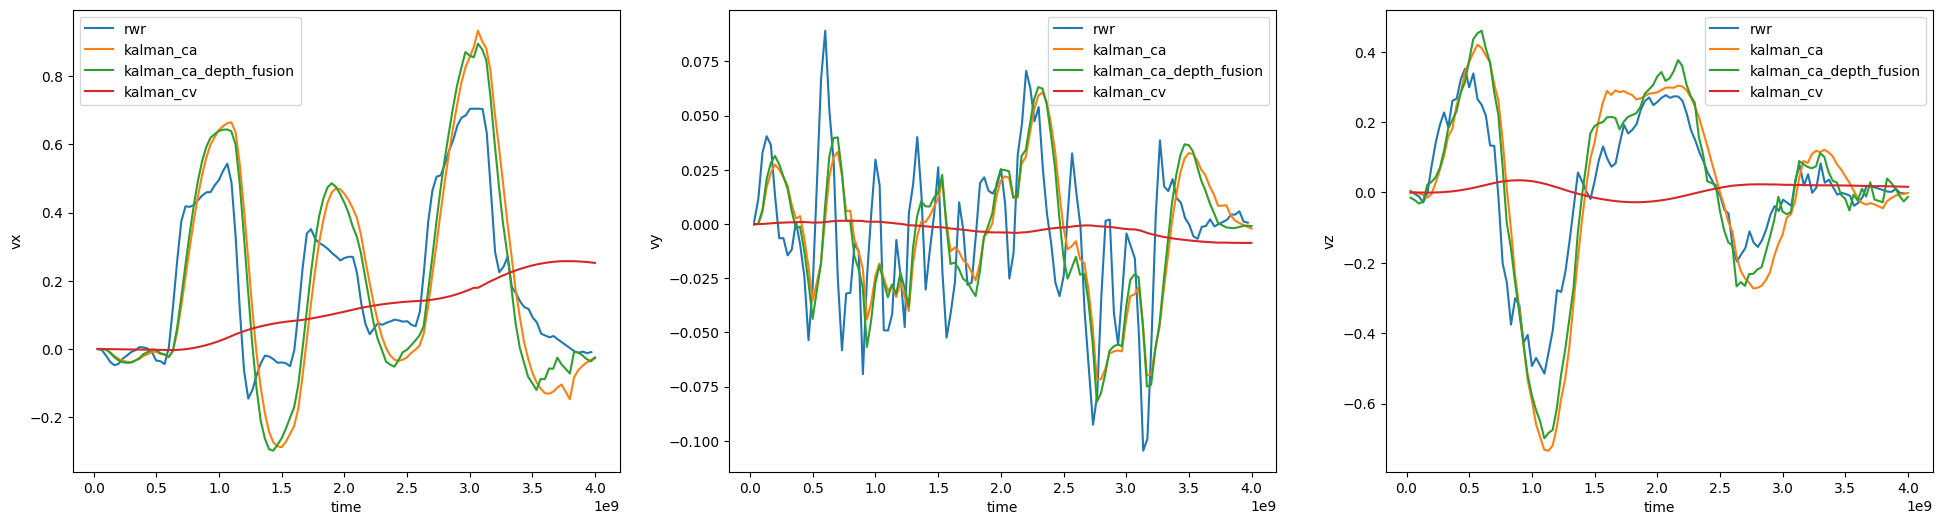

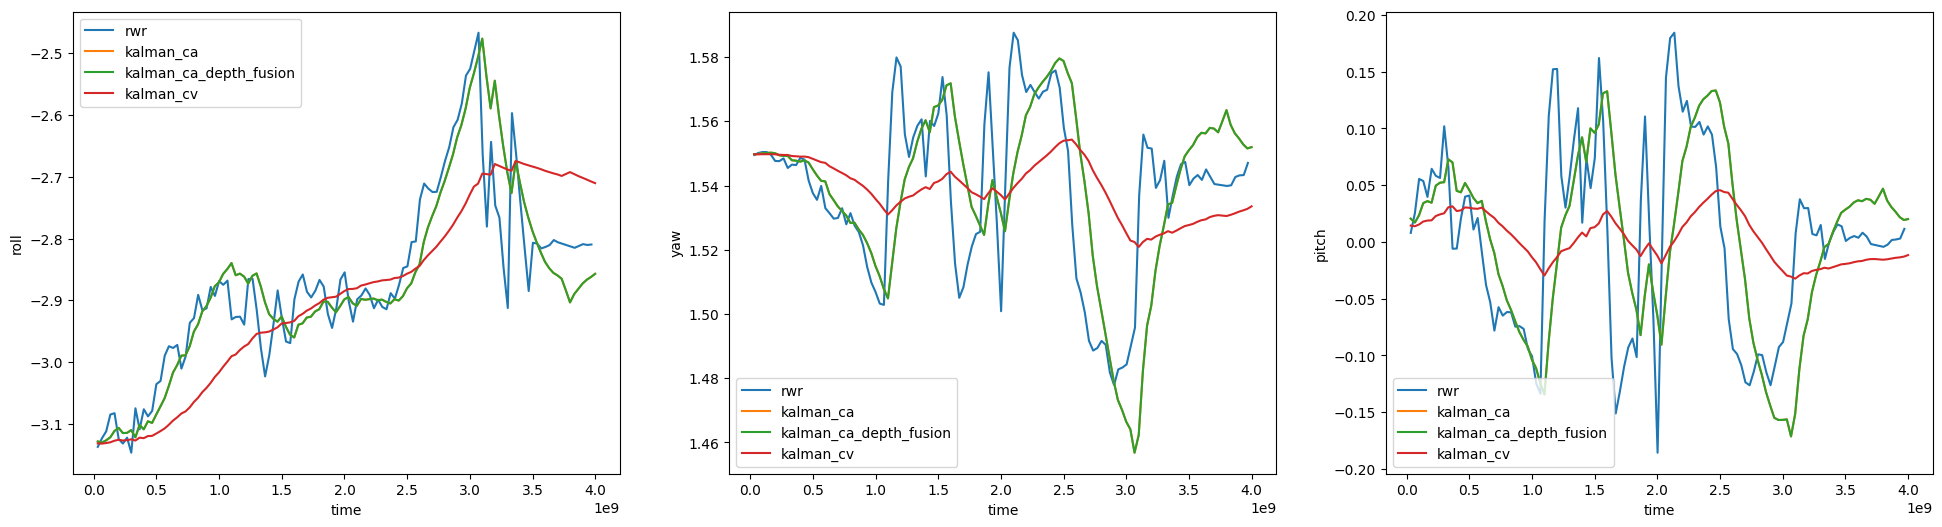

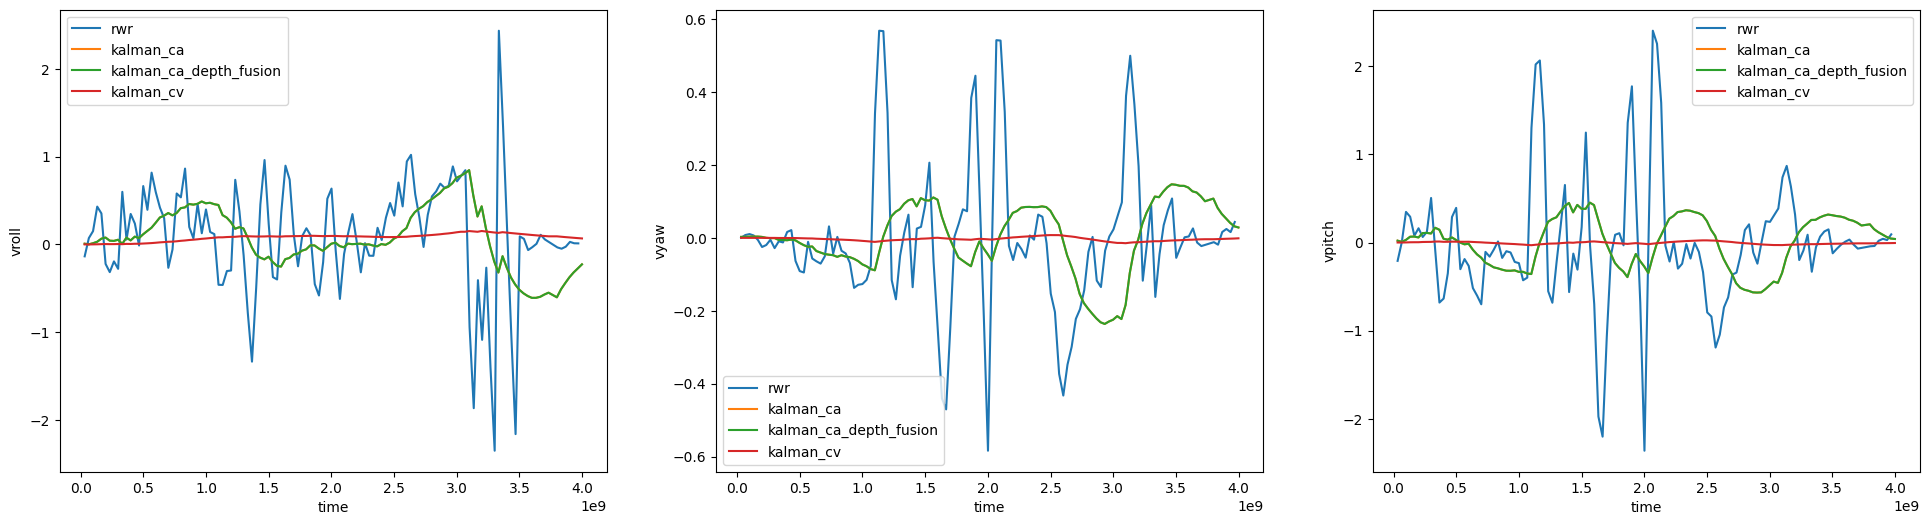

In [4]:
# Plot the data over time

plt.figure(figsize=(24, 6))

plt.subplot(1, 3, 1)
sns.lineplot(data=rwr_data, x='time', y='tx', label='rwr')
sns.lineplot(data=ca_data, x='time', y='tx', label='kalman_ca')
sns.lineplot(data=ca_depth_fusion_data, x='time', y='tx', label='kalman_ca_depth_fusion')
sns.lineplot(data=cv_data, x='time', y='tx', label='kalman_cv')
sns.lineplot(data=opp_rel_poses, x='time', y='tx', label='PnP')
sns.lineplot(data=opp_rel_poses, x='time', y='depth_tx', label='depth')

plt.subplot(1, 3, 2)
sns.lineplot(data=rwr_data, x='time', y='ty', label='rwr')
sns.lineplot(data=ca_data, x='time', y='ty', label='kalman_ca')
sns.lineplot(data=ca_depth_fusion_data, x='time', y='ty', label='kalman_ca_depth_fusion')
sns.lineplot(data=cv_data, x='time', y='ty', label='kalman_cv')
sns.lineplot(data=opp_rel_poses, x='time', y='ty', label='PnP')
sns.lineplot(data=opp_rel_poses, x='time', y='depth_ty', label='depth')

plt.subplot(1, 3, 3)
sns.lineplot(data=rwr_data, x='time', y='tz', label='rwr')
sns.lineplot(data=ca_data, x='time', y='tz', label='kalman_ca')
sns.lineplot(data=ca_depth_fusion_data, x='time', y='tz', label='kalman_ca_depth_fusion')
sns.lineplot(data=cv_data, x='time', y='tz', label='kalman_cv')
sns.lineplot(data=opp_rel_poses, x='time', y='tz', label='PnP')
sns.lineplot(data=opp_rel_poses, x='time', y='depth_tz', label='depth')

plt.figure(figsize=(24, 6))

plt.subplot(1, 3, 1)
sns.lineplot(data=rwr_data, x='time', y='vx', label='rwr')
sns.lineplot(data=ca_data, x='time', y='vx', label='kalman_ca')
sns.lineplot(data=ca_depth_fusion_data, x='time', y='vx', label='kalman_ca_depth_fusion')
sns.lineplot(data=cv_data, x='time', y='vx', label='kalman_cv')

plt.subplot(1, 3, 2)
sns.lineplot(data=rwr_data, x='time', y='vy', label='rwr')
sns.lineplot(data=ca_data, x='time', y='vy', label='kalman_ca')
sns.lineplot(data=ca_depth_fusion_data, x='time', y='vy', label='kalman_ca_depth_fusion')
sns.lineplot(data=cv_data, x='time', y='vy', label='kalman_cv')

plt.subplot(1, 3, 3)
sns.lineplot(data=rwr_data, x='time', y='vz', label='rwr')
sns.lineplot(data=ca_data, x='time', y='vz', label='kalman_ca')
sns.lineplot(data=ca_depth_fusion_data, x='time', y='vz', label='kalman_ca_depth_fusion')
sns.lineplot(data=cv_data, x='time', y='vz', label='kalman_cv')

plt.figure(figsize=(24, 6))

plt.subplot(1, 3, 1)
sns.lineplot(data=rwr_data, x='time', y='roll', label='rwr')
sns.lineplot(data=ca_data, x='time', y='roll', label='kalman_ca')
sns.lineplot(data=ca_depth_fusion_data, x='time', y='roll', label='kalman_ca_depth_fusion')
sns.lineplot(data=cv_data, x='time', y='roll', label='kalman_cv')

plt.subplot(1, 3, 2)
sns.lineplot(data=rwr_data, x='time', y='yaw', label='rwr')
sns.lineplot(data=ca_data, x='time', y='yaw', label='kalman_ca')
sns.lineplot(data=ca_depth_fusion_data, x='time', y='yaw', label='kalman_ca_depth_fusion')
sns.lineplot(data=cv_data, x='time', y='yaw', label='kalman_cv')

plt.subplot(1, 3, 3)
sns.lineplot(data=rwr_data, x='time', y='pitch', label='rwr')
sns.lineplot(data=ca_data, x='time', y='pitch', label='kalman_ca')
sns.lineplot(data=ca_depth_fusion_data, x='time', y='pitch', label='kalman_ca_depth_fusion')
sns.lineplot(data=cv_data, x='time', y='pitch', label='kalman_cv')

plt.figure(figsize=(24, 6))

plt.subplot(1, 3, 1)
sns.lineplot(data=rwr_data, x='time', y='vroll', label='rwr')
sns.lineplot(data=ca_data, x='time', y='vroll', label='kalman_ca')
sns.lineplot(data=ca_depth_fusion_data, x='time', y='vroll', label='kalman_ca_depth_fusion')
sns.lineplot(data=cv_data, x='time', y='vroll', label='kalman_cv')

plt.subplot(1, 3, 2)
sns.lineplot(data=rwr_data, x='time', y='vyaw', label='rwr')
sns.lineplot(data=ca_data, x='time', y='vyaw', label='kalman_ca')
sns.lineplot(data=ca_depth_fusion_data, x='time', y='vyaw', label='kalman_ca_depth_fusion')
sns.lineplot(data=cv_data, x='time', y='vyaw', label='kalman_cv')

plt.subplot(1, 3, 3)
sns.lineplot(data=rwr_data, x='time', y='vpitch', label='rwr')
sns.lineplot(data=ca_data, x='time', y='vpitch', label='kalman_ca')
sns.lineplot(data=ca_depth_fusion_data, x='time', y='vpitch', label='kalman_ca_depth_fusion')
sns.lineplot(data=cv_data, x='time', y='vpitch', label='kalman_cv')